In [1]:
import numpy as np
import matplotlib
from matplotlib.colors import ListedColormap

def plot_tree(clf, X, y):
    xx1, xx2 = np.meshgrid(np.arange(-1, 31, 0.5),
                           np.arange(-1, 31, 0.5))
    Z = tree.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')
    plt.show()

In [3]:
# データの読み込み
import pandas as pd
df = pd.read_csv('data2.csv')
df.head(3)

,x0,x1,y
0,6.938582,17.623393,0.0
1,27.417628,8.180353,0.0
2,21.562673,11.799253,0.0


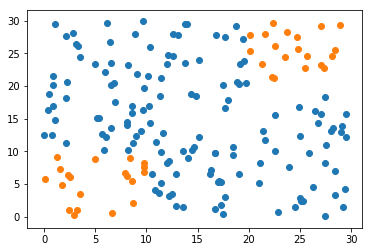

In [4]:
# データのプロット
import matplotlib.pyplot as plt
plt.scatter(df[df['y'] == 0]['x0'], df[df['y'] == 0]['x1'])
plt.scatter(df[df['y'] == 1]['x0'], df[df['y'] == 1]['x1'])
plt.show()

In [5]:
# 学習用に整形、トレーニング・テスト用に分割

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [7]:
# 学習

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# スコア算出
tree.score(X_test, y_test)

0.85185185185185186

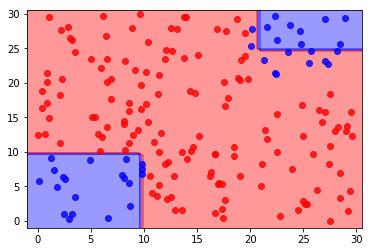

In [9]:
# プロット
plot_tree(tree, X, y)
plt.show()